# COGS 108 - Final Project 

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that PIDs will be scraped from the public submission, but student names will be included.)

* [  ] YES - make available
* [ x ] NO - keep private

# Overview

There have been some debates about the best wine overall and favorites of top 19 wine enthusiasts, or which country relatively produces better wines compared to the others, for example: U.S vs European countries. We would take statistical analysis on the wine review dataset to identify the highest rated wines, while comparing between wineries, vineyards, type of grapes, prices, and regions. We would then reach the conclusion regarding which wine is the best wine. 

# Names

- Devin Junanto
- Gabriela Shirley
- Natalia Sudjana
- Shih Gau Peng

# Group Members IDs

- A15754079
- A16095578
- A16112711
- A16059733

# Research Question

1. What is the best wine overall based on the ratings given by wine enthusiasts?
2. Which continent, and country more specifically, produce the most high-rated wines? 
3. What type of grapes relatively produce the most high-rated wines?
4. Does the age (in year) of the wine as well as the price determine the wine ratings?
5. Which wines are good recommendations to the wine tasters based on their ‘winery’ and ‘types of grapes’ preferences?
6. Predict the points given to a new wine based on its taster name, winery, variety (type of grapes), country, continent, age, and price.

## Background and Prior Work

Winer are ever changing in relation to time. People’s taste buds vary but there may be a similarity of tastes once we analyze our big data sets. Every county, province, state, and country offers a breadth of wine varietal. Thus, through this project, we put high interest to identify which region produces the high-rated wines based on the points given by nineteen wine enthusiasts.

Based on some prior works that we looked into, the best wine overall is Promontory 2013 from Napa Valley, U.S.2. While from another source, Chateau Montelena Napa Valley Chardonnay 2016 from Napa Valley, U.S.3 is on the top of the list, with another similar wine type named Chateau Leoville Barton St. Julien 2016 from France that also placed first out of 100 on a different source4. By comparing these top three sources from the internet, we could see how different their answers to the question “What is the best wine overall?”. Looking at varying sources, we could not rely on one as each source would have different research techniques to build up their lists. Therefore, as to fulfill our team’s curiosity of the real wine ratings and countries that produce them, we would analyze the “Wine Reviews” dataset1 from 2018 to come up with answers to our research questions.

The wine datasets from Kaggle gathered as much as 130,000 wines which contain several variables such as the variety, winery, price, description, and ratings as well as where they were produced which would help us analyze the findings and recommend wines to the wine tasters . We would like to gather what we have learned in class and use that knowledge to wrangle and analyze data until we come to a conclusion, while we are taking into account the people's privacy.

References (include links):

1) https://www.kaggle.com/zynicide/wine-reviews#winemag-data_first150k.csv

2) https://robbreport.com/best-of-the-best/2019-best-wine-285174

3) https://vinepair.com/articles/best-wines-2019/

4) https://top100.winespectator.com/lists/


# Hypothesis


1. We hypothesize that the type of wines that wine testers prefer come from their type of grape called Chardonnay as the type of grapes most preferred as well as the highest rated wine being the Chateau Montelena Napa Valley Chardonnay 2016. 
2. We hypothesize that Europe as a continent and France as a country would produce the highest rated wines as they are pretty well known for their wines.
3. We hypothesize as the wine ages more, they would increase in quality which are represented in their price value, this also directly means that they would increase in terms of their ratings as wine enthusiasts would then enjoy aged wine more.

# Dataset(s)

Dataset Name: Wine Reviews 2018

Link to the dataset: https://www.kaggle.com/zynicide/wine-reviews#winemag-data-130k-v2.csv

Number of observations: 130,000 rows, 14 columns

Description: this dataset was scraped from WineEnthusiast around June 2017, and updated around November 2017 which contains 130,000 wine reviews with variety, location, winery, price, and descriptions.

# Setup

##### 1.1 Import library

In [1]:
import numpy as np
import gzip
import urllib.request
import tarfile
import random
import string
from copy import deepcopy
import pandas as pd
from collections import defaultdict
import json
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import seaborn as sns
%matplotlib notebook

In [2]:
##### 1.2 Read data from json file

In [3]:
df_wine = pd.read_json("winemag-data-130k-v2.json")

In [4]:
##### 1.3 Check column labels

In [5]:
df_wine.columns.values

array(['points', 'title', 'description', 'taster_name',
       'taster_twitter_handle', 'price', 'designation', 'variety',
       'region_1', 'region_2', 'province', 'country', 'winery'],
      dtype=object)

# Data Cleaning

##### 2.1 Remove unnecessary columns

In [6]:
df_wine = df_wine.drop(['province', 'region_1', 'region_2', 'description', 'taster_twitter_handle'], axis=1)

In [7]:
df_wine

,points,title,taster_name,price,designation,variety,country,winery
0,87,Nicosia 2013 Vulkà Bianco (Etna),Kerin O’Keefe,NaN,Vulkà Bianco,White Blend,Italy,Nicosia
1,87,Quinta dos Avidagos 2011 Avidagos Red (Douro),Roger Voss,15.0,Avidagos,Portuguese Red,Portugal,Quinta dos Avidagos
2,87,Rainstorm 2013 Pinot Gris (Willamette Valley),Paul Gregutt,14.0,None,Pinot Gris,US,Rainstorm
3,87,St. Julian 2013 Reserve Late Harvest Riesling ...,Alexander Peartree,13.0,Reserve Late Harvest,Riesling,US,St. Julian
4,87,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Paul Gregutt,65.0,Vintner's Reserve Wild Child Block,Pinot Noir,US,Sweet Cheeks
...,...,...,...,...,...,...,...,...
129966,90,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Anna Lee C. Iijima,28.0,Brauneberger Juffer-Sonnenuhr Spätlese,Riesling,Germany,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,90,Citation 2004 Pinot Noir (Oregon),Paul Gregutt,75.0,None,Pinot Noir,US,Citation
129968,90,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Roger Voss,30.0,Kritt,Gewürztraminer,France,Domaine Gresser
129969,90,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Roger Voss,32.0,None,Pinot Gris,France,Domaine Marcel Deiss


##### 2.2 Dropping all the none values

In [8]:
df_wine = df_wine.dropna(subset = ['country', 'description', 'points', 'price', 'title', 'variety', 'winery'])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


##### 2.3 Get the continent based on the country given

In [9]:
def continent(country):
    if country in ['US', 'Canada', 'Mexico']:
        return 'North America'
    elif country in ['France', 'Italy', 'Spain', 'Portugal', 'Austria', 'Germany', 'Greece', 'Hungary', 'Bulgaria', 'Romania'
                     , 'Turkey', 'Slovenia', 'Georgia', 'England', 'Croatia', 'Moldova', 'Ukraine', 'Macedonia', 'Czech Republic'
                     , 'Serbia', 'Cyprus', 'Switzerland', 'Luxembourg', 'Bosnia and Herzegovina', 'Armenia', 'Slovakia']:
        return 'Europe'
    elif country in ['Chile', 'Argentina', 'Uruguay', 'Brazil', 'Peru']:
        return 'South America'
    elif country in ['Israel', 'India', 'China']:
        return 'Asia'
    elif country in ['Australia', 'New Zealand']:
        return 'Oceania'
    elif country in ['South Africa', 'Egypt', 'Morocco']:
        return 'Africa'
    else:
        return np.nan

In [10]:
df_wine['continent'] = df_wine['country'].apply(continent)

##### 2.4 Get the year and age from the title of the wine

In [11]:
def getYear(string):
    splitStr = []
    splitStr = string.split(' ')
    for a in splitStr:
        if a.isnumeric() == True:
            if int(a) >= 1934 and int(a) <= 2020:
                return a
            else:
                continue
        else:
            continue
    return np.nan

In [12]:
df_wine['year'] = df_wine['title'].apply(getYear)

In [13]:
def getAge(year):
    if type(year) == float:
        return np.nan
    else:
        age = 2018 - int(year)
        return age

In [14]:
df_wine['age'] = df_wine['year'].apply(getAge)

##### 2.5 Get the description of the data

In [15]:
df_wine.head()

,points,title,taster_name,price,designation,variety,country,winery,continent,year,age
0,87,Nicosia 2013 Vulkà Bianco (Etna),Kerin O’Keefe,NaN,Vulkà Bianco,White Blend,Italy,Nicosia,Europe,2013,5.0
1,87,Quinta dos Avidagos 2011 Avidagos Red (Douro),Roger Voss,15.0,Avidagos,Portuguese Red,Portugal,Quinta dos Avidagos,Europe,2011,7.0
2,87,Rainstorm 2013 Pinot Gris (Willamette Valley),Paul Gregutt,14.0,None,Pinot Gris,US,Rainstorm,North America,2013,5.0
3,87,St. Julian 2013 Reserve Late Harvest Riesling ...,Alexander Peartree,13.0,Reserve Late Harvest,Riesling,US,St. Julian,North America,2013,5.0
4,87,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Paul Gregutt,65.0,Vintner's Reserve Wild Child Block,Pinot Noir,US,Sweet Cheeks,North America,2012,6.0


# Data Analysis & Results

##### 3.1 Get the average of wine ratings

In [16]:
df_wine['points'].mean()

88.44713820775404

##### 3.2 Get the number of wine tasters

In [17]:
df_wine['taster_name'].value_counts().count()

19

##### 3.3 Get the number of the wine title

In [18]:
df_wine['title'].value_counts().count()

118840

##### 3.4 Get the number of the winery

In [19]:
df_wine['winery'].value_counts().count()

16757

##### 3.5 Get the number of the country

In [20]:
df_wine['country'].value_counts().count()

43

##### 3.6 Get the average rating that each wine taster gives to get a sense of their overall standard

In [21]:
taster = []
taster = df_wine['taster_name'].value_counts().keys().to_list()
average_taster = []
for a in taster:
    average_taster.append(df_wine[df_wine['taster_name'] == a].points.mean())
df_taster = pd.DataFrame({'taster_name':taster, 'points':average_taster})
df_taster = df_taster.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_taster = df_taster.set_index('taster_name')

In [22]:
df_taster

,points
taster_name,
Anne Krebiehl MW,90.562551
Matt Kettmann,90.008686
Virginie Boone,89.213379
Mike DeSimone,89.101167
Paul Gregutt,89.082564
Kerin O’Keefe,88.867947
Sean P. Sullivan,88.755739
Roger Voss,88.708003
Jim Gordon,88.626287


##### 3.7 Get the continents that produce the best wines based on the wine tasters' ratings

In [23]:
continent = []
continent = df_wine['continent'].value_counts().keys().to_list()
average_continent = []
for a in continent:
    average_continent.append(df_wine[df_wine['continent'] == a].points.mean())
df_continent = pd.DataFrame({'continent':continent, 'points':average_continent})
df_continent = df_continent.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_continent = df_continent.set_index('continent')

In [24]:
df_continent

,points
continent,
Europe,88.608982
North America,88.563276
Asia,88.502913
Oceania,88.475454
Africa,88.063636
South America,86.577583


##### 3.8 Get the countries that produce the best wines based on the wine tasters' ratings

In [25]:
country = []
country = df_wine['country'].value_counts().keys().to_list()
average_country = []
for a in country:
    average_country.append(df_wine[df_wine['country'] == a].points.mean())
df_country = pd.DataFrame({'country':country, 'points':average_country})
df_country = df_country.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_country = df_country.set_index('country')

In [26]:
df_country

,points
country,
England,91.581081
India,90.222222
Austria,90.101345
Germany,89.851732
Canada,89.369650
Hungary,89.191781
China,89.000000
France,88.845109
Luxembourg,88.666667


##### 3.9 Get the wineries that produce the best wines based on the wine tasters' ratings

In [27]:
winery = df_wine['winery'].unique()
winery

array(['Nicosia', 'Quinta dos Avidagos', 'Rainstorm', ...,
       'Mas de Pampelonne', 'Bodegas Eidosela', 'Penedo Borges'],
      dtype=object)

In [28]:
avg1 = []
for i in winery:
    avg1.append(df_wine[df_wine.winery == i]['points'].mean())

In [29]:
wavg_points = {'Winery': winery, 'Average Points': avg1} 

wavg_points = pd.DataFrame(wavg_points) 
 
wavg_points = wavg_points.sort_values(by=['Average Points'], ascending=False)

wavg_points

,Winery,Average Points
11466,Araujo,98.0
16486,Gandona,97.0
16485,Ovid,97.0
15600,J.L. Chave,97.0
7914,Salon,96.8
...,...,...
16310,Gran Familia,80.0
7130,Villa Viña,80.0
16334,Capay Valley,80.0
14868,Moss Roxx,80.0


##### 3.10 Get the best type of grapes based on the wine tasters' ratings

In [30]:
grapes = df_wine['variety'].unique()
grapes

array(['White Blend', 'Portuguese Red', 'Pinot Gris', 'Riesling',
       'Pinot Noir', 'Tempranillo-Merlot', 'Frappato', 'Gewürztraminer',
       'Cabernet Sauvignon', 'Nerello Mascalese', 'Chardonnay', 'Malbec',
       'Tempranillo Blend', 'Meritage', 'Red Blend', 'Merlot',
       "Nero d'Avola", 'Chenin Blanc', 'Gamay', 'Sauvignon Blanc',
       'Viognier-Chardonnay', 'Primitivo', 'Catarratto', 'Inzolia',
       'Petit Verdot', 'Monica', 'Bordeaux-style White Blend', 'Grillo',
       'Sangiovese', 'Cabernet Franc', 'Champagne Blend',
       'Bordeaux-style Red Blend', 'Aglianico', 'Petite Sirah',
       'Touriga Nacional', 'Carmenère', 'Albariño', 'Petit Manseng',
       'Rosé', 'Zinfandel', 'Vernaccia', 'Rosato', 'Grüner Veltliner',
       'Viognier', 'Vermentino', 'Grenache Blanc', 'Syrah', 'Nebbiolo',
       'Shiraz-Cabernet Sauvignon', 'Pinot Blanc', 'Alsace white blend',
       'Barbera', 'Rhône-style Red Blend', 'Portuguese White', 'Graciano',
       'Tannat-Cabernet', 'Sauvign

In [31]:
avg = []
for i in grapes:
    avg.append(df_wine[df_wine.variety == i]['points'].mean())

##### 3.11 Get the best wines overall based on the wine tasters' ratings

In [32]:
wine = df_wine['title'].unique()
wine

array(['Nicosia 2013 Vulkà Bianco  (Etna)',
       'Quinta dos Avidagos 2011 Avidagos Red (Douro)',
       'Rainstorm 2013 Pinot Gris (Willamette Valley)', ...,
       'Domaine Gresser 2013 Kritt Gewurztraminer (Alsace)',
       'Domaine Marcel Deiss 2012 Pinot Gris (Alsace)',
       'Domaine Schoffit 2012 Lieu-dit Harth Cuvée Caroline Gewurztraminer (Alsace)'],
      dtype=object)

In [33]:
avg = []
for i in wine:
    avg.append(df_wine[df_wine.title == i]['points'].mean())

In [34]:
wine_avg_points = {'Wine':wine, 'Average Points': avg} 

wine_avg_points = pd.DataFrame(wine_avg_points) 
 
wine_avg_points = wine_avg_points.sort_values(by=['Average Points'], ascending=False)

wine_avg_points[wine_avg_points['Average Points'] == 100]

,Wine,Average Points
84249,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,100.0
103443,Château Léoville Las Cases 2010 Saint-Julien,100.0
41019,Casa Ferreirinha 2008 Barca-Velha Red (Douro),100.0
56012,Château Léoville Barton 2010 Saint-Julien,100.0
113445,Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...,100.0
44375,Cardinale 2006 Cabernet Sauvignon (Napa Valley),100.0
105287,Charles Smith 2006 Royal City Syrah (Columbia ...,100.0
44358,Biondi Santi 2010 Riserva (Brunello di Montal...,100.0
103440,Château Lafite Rothschild 2010 Pauillac,100.0
103441,Casanova di Neri 2007 Cerretalto (Brunello di...,100.0


##### 3.12 Find out if age (in year) determines the the wine quality (represented by its score)

In [35]:
age = []
age = df_wine['age'].value_counts().keys().to_list()
average_age = []
for a in age:
    average_age.append(df_wine[df_wine['age'] == a].points.mean())
df_age = pd.DataFrame({'age':age, 'points':average_age})
df_age = df_age.sort_values(by=['age'], ascending=True).reset_index(drop=True)
df_age = df_age.set_index('age')

In [36]:
df_age

,points
age,
1.0,85.545455
2.0,87.687077
3.0,88.519200
4.0,88.867283
5.0,88.952189
6.0,88.774052
7.0,88.277672
8.0,88.262020
9.0,88.334987


<IPython.core.display.Javascript object>


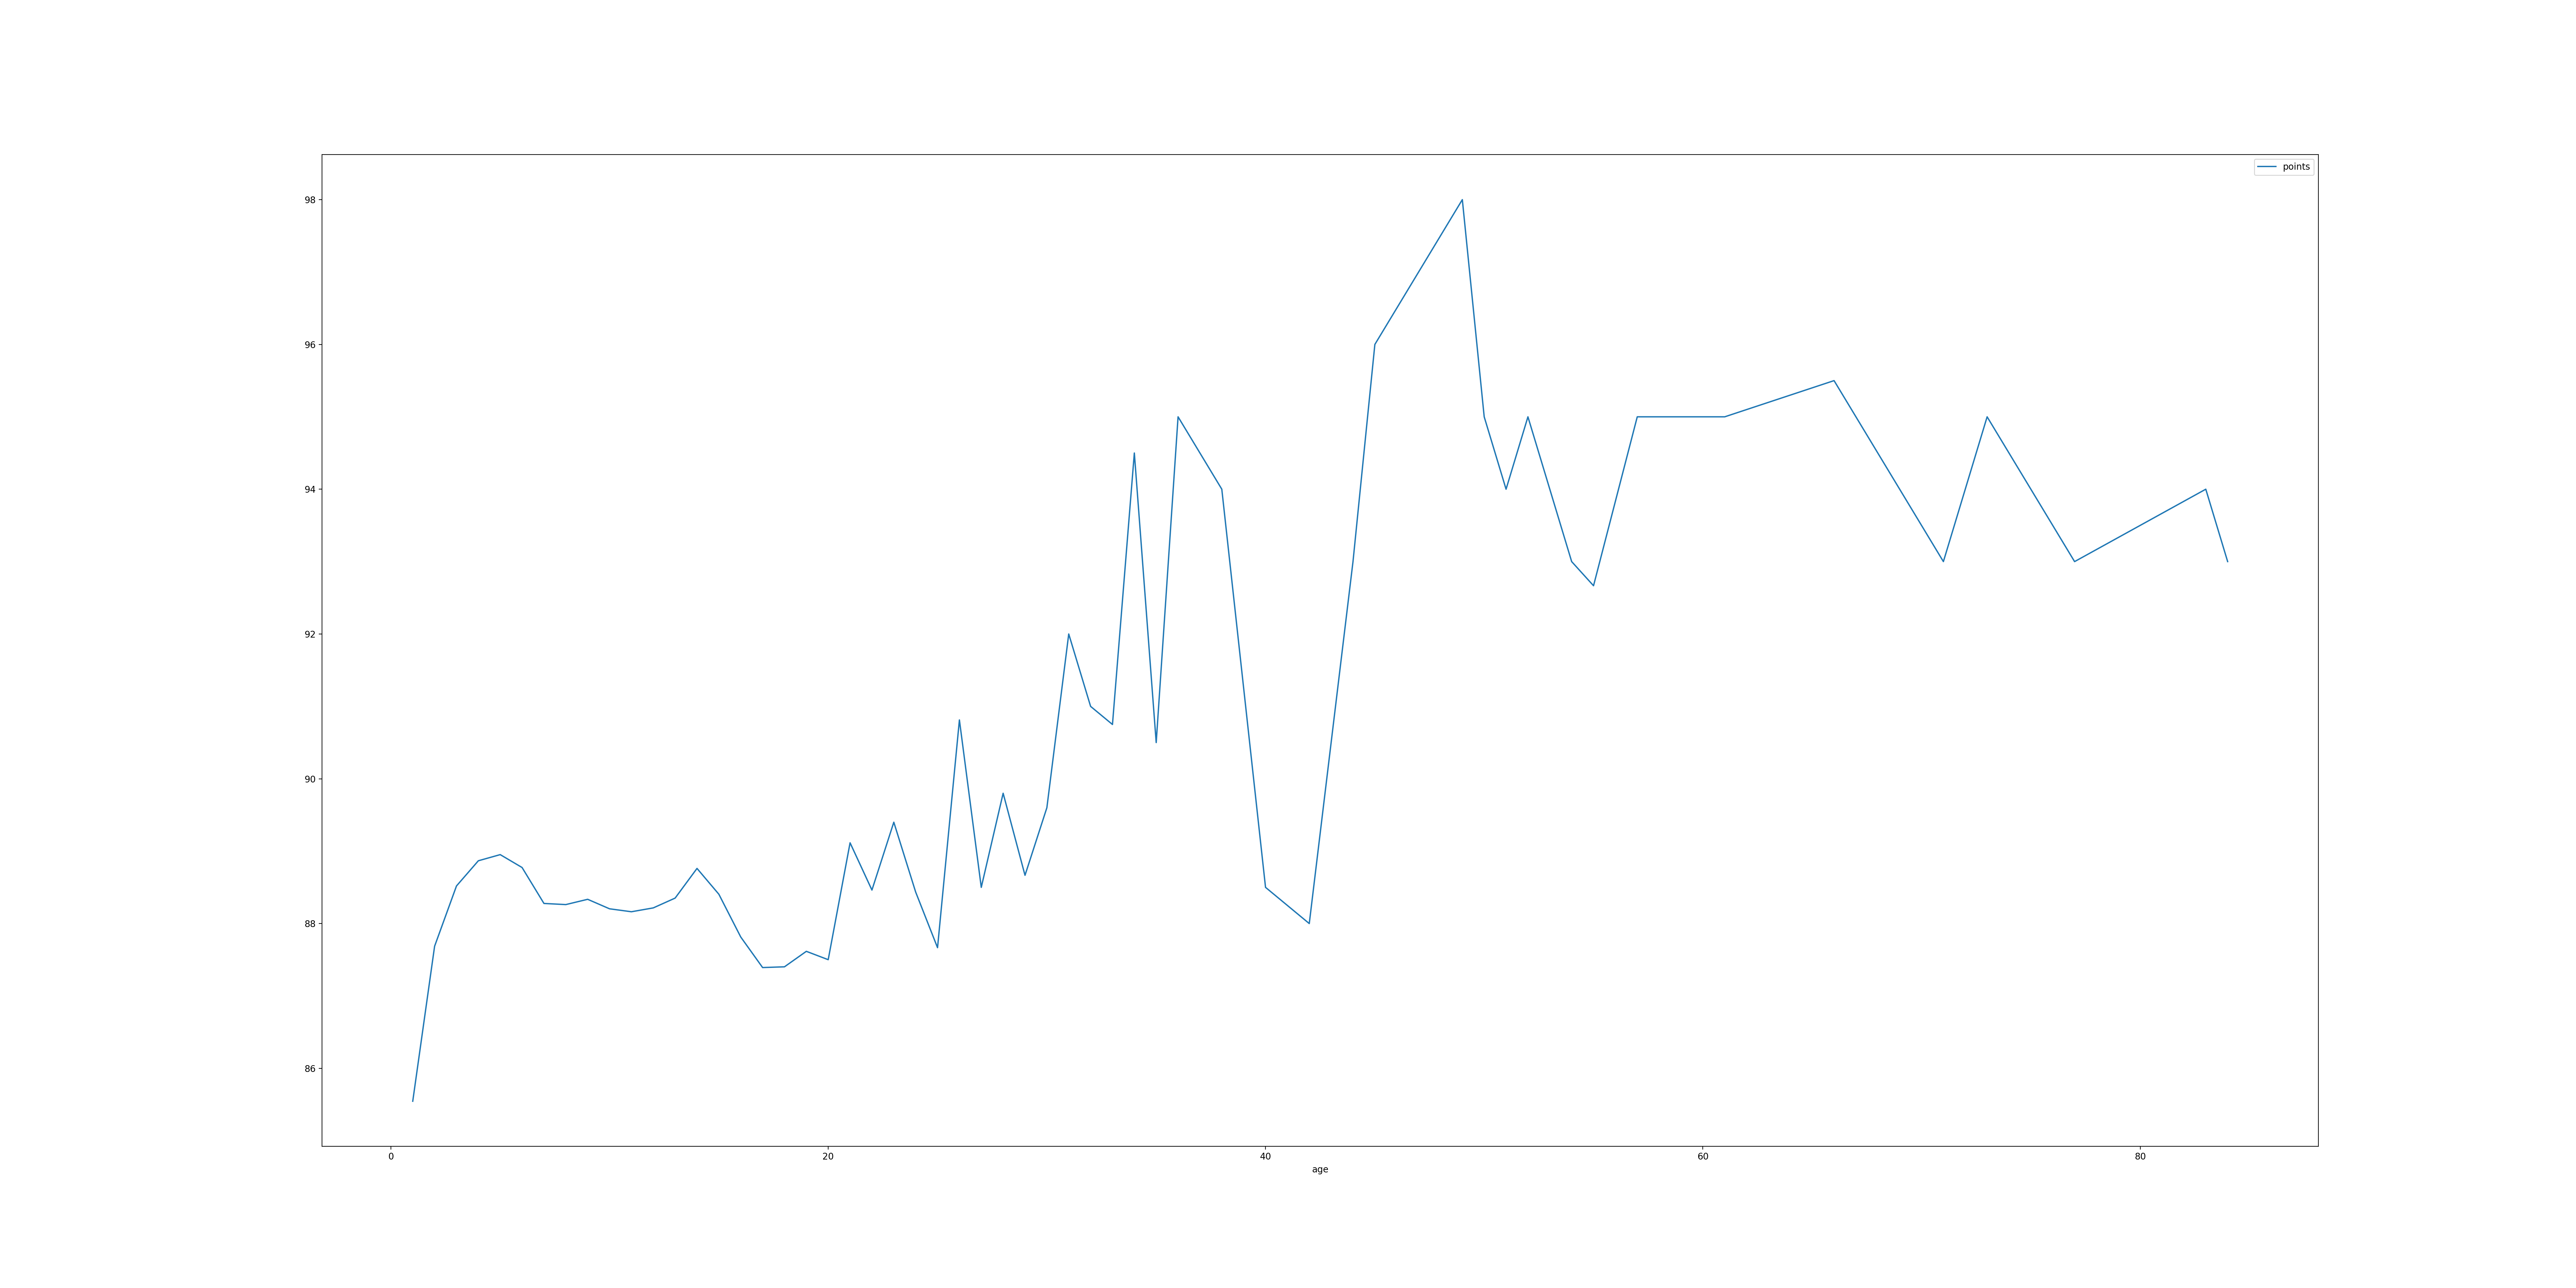

In [37]:
df_age.plot(kind='line', figsize=(40,20))

Analyzing the data comparing the points of the wines based on their age. Even though there are some extreme data and outliers, such as the significant decrease in points for wines of 40 years old, we can still see the gradual increase in points for wines from 0 years-old to around 50 years-old. After that, the points start to decrease as the wines’ age increases. The graph shows a distribution similar to a Weibull distribution.

##### 3.13 Find out if price (in USD) determines the the wine quality (represented by its score)

In [38]:
price = []
price = df_wine['price'].value_counts().keys().to_list()
average_price = []
for a in price:
    average_price.append(df_wine[df_wine['price'] == a].points.mean())
df_price = pd.DataFrame({'price':price, 'points':average_price})
df_price = df_price.sort_values(by=['price'], ascending=True).reset_index(drop=True)
df_price = df_price.set_index('price')

In [39]:
df_price

,points
price,
4.0,84.272727
5.0,83.586957
6.0,84.341667
7.0,84.450346
8.0,84.628924
...,...
1900.0,98.000000
2000.0,96.500000
2013.0,91.000000


<IPython.core.display.Javascript object>


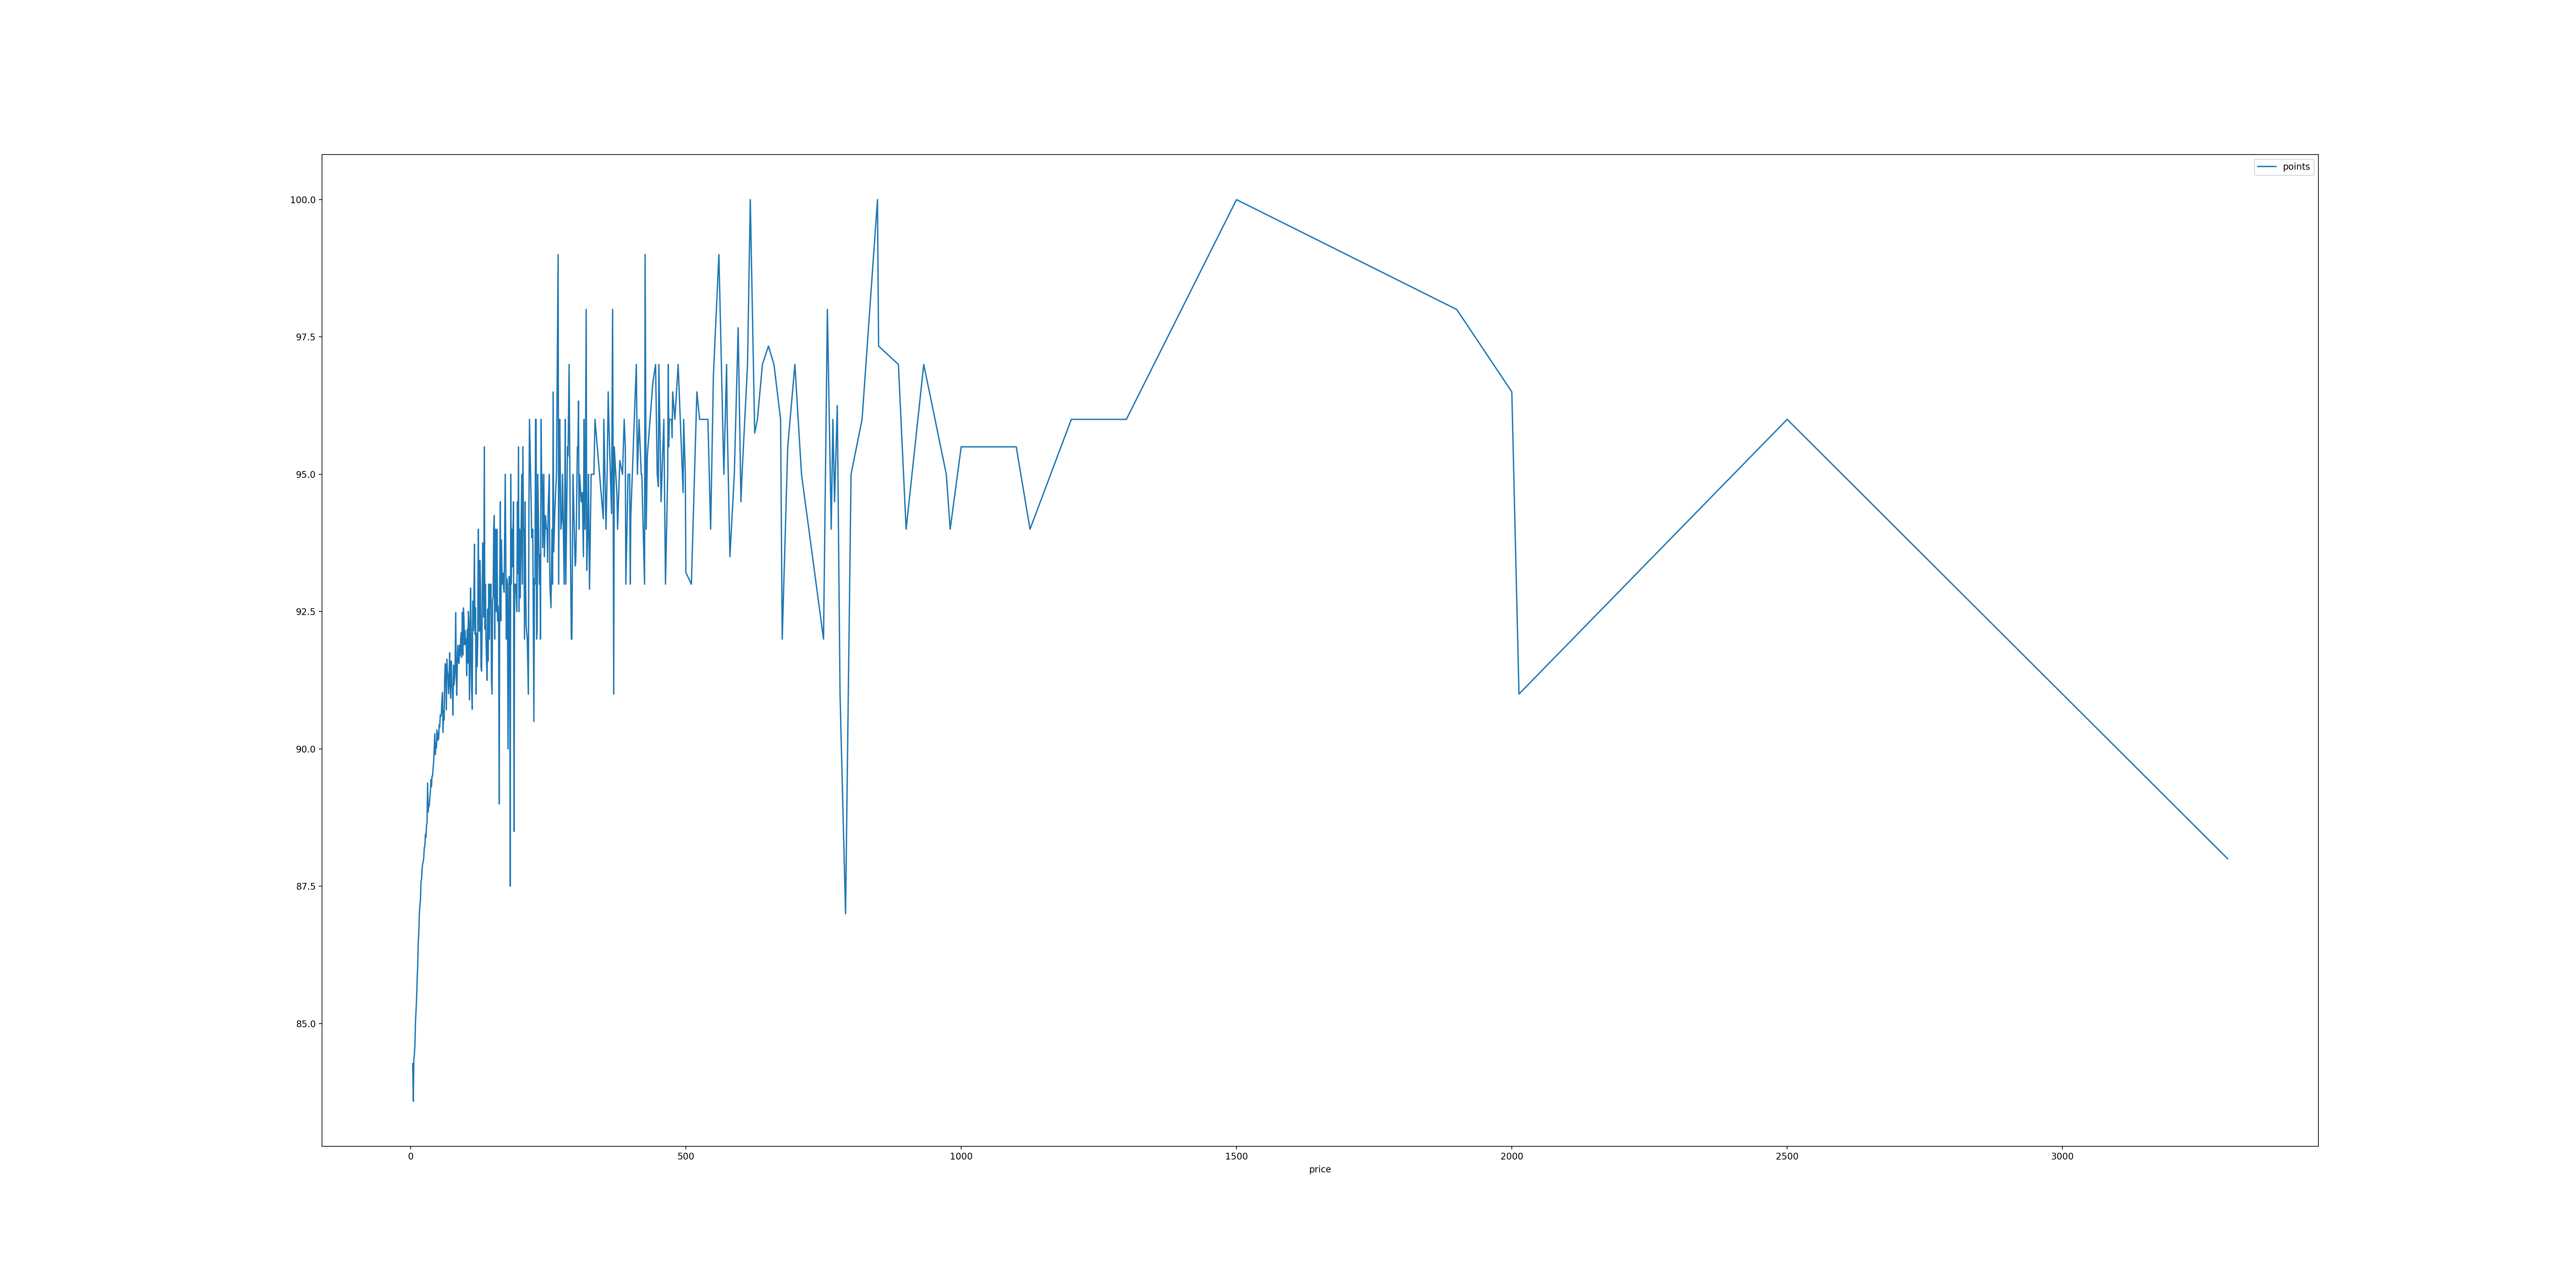

In [112]:
df_price.plot(kind='line', figsize=(40,20))

Analyzing the data comparing the points of the wines based on their price. There is no very clear distribution of this data. In other words, with the same price, there can be both very high or very low points given. It would be very difficult (or unlikely) to see the pattern of points by looking only at the price.

##### 3.14 Give suggestion to each wine taster based on their preferred winery and variety

In [41]:
def getSuggestion(dfWinery, dfVariety, tasterName):
    return df_wine.loc[((df_wine['winery'] == dfWinery.index.tolist()[0])
                                  | (df_wine['winery'] == dfWinery.index.tolist()[1])
                                  | (df_wine['winery'] == dfWinery.index.tolist()[2])
                                  | (df_wine['winery'] == dfWinery.index.tolist()[3])
                                  | (df_wine['winery'] == dfWinery.index.tolist()[4])
                                  | (df_wine['winery'] == dfWinery.index.tolist()[0])
                                  | (df_wine['variety'] == dfVariety.index.tolist()[1])
                                  | (df_wine['variety'] == dfVariety.index.tolist()[2])
                                  | (df_wine['variety'] == dfVariety.index.tolist()[3])
                                  | (df_wine['variety'] == dfVariety.index.tolist()[4]))
                                 & (df_wine['taster_name'] != tasterName)]

Wine suggestion list for Roger Voss

In [42]:
df_voss = df_wine.loc[df_wine['taster_name'] == 'Roger Voss']
df_voss = df_voss.reset_index(drop=True)

In [43]:
winery_voss = []
winery_voss = df_voss['winery'].value_counts().keys().to_list()
average_winery_voss = []
for a in winery_voss:
    average_winery_voss.append(df_voss[df_voss['winery'] == a].points.mean())
df_winery_voss = pd.DataFrame({'winery':winery_voss, 'points':average_winery_voss})
df_winery_voss = df_winery_voss.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_voss = df_winery_voss.set_index('winery')

In [44]:
variety_voss = []
variety_voss = df_voss['variety'].value_counts().keys().to_list()
average_variety_voss = []
for a in variety_voss:
    average_variety_voss.append(df_voss[df_voss['variety'] == a].points.mean())
df_variety_voss = pd.DataFrame({'variety':variety_voss, 'points':average_variety_voss})
df_variety_voss = df_variety_voss.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_voss = df_variety_voss.set_index('variety')

In [45]:
df_suggestion_voss = getSuggestion(df_winery_voss, df_variety_voss, 'Roger Voss')
df_suggestion_voss = df_suggestion_voss.sort_values(by=['points'], ascending=False).head()
df_suggestion_voss

,points,title,taster_name,price,designation,variety,country,winery,continent,year,age
75556,96,Salon 1985 Le Mesnil Blanc de Blancs Brut Char...,None,216.0,Le Mesnil Blanc de Blancs Brut,Chardonnay,France,Salon,Europe,1985,33.0
18792,93,Salon 1988 Le Mesnil Blanc de Blancs Brut Char...,Joe Czerwinski,200.0,Le Mesnil Blanc de Blancs Brut,Chardonnay,France,Salon,Europe,1988,30.0
65796,90,Knipser 2008 Trocken Chardonnay Weissburgunder...,None,25.0,Trocken,Chardonnay Weissburgunder,Germany,Knipser,Europe,2008,10.0
67382,88,Krug 1988 Brut (Champagne),None,230.0,Brut,Champagne Blend,France,Krug,Europe,1988,30.0
67389,88,Krug NV Grande Cuvée Brut (Champagne),None,160.0,Grande Cuvée Brut,Champagne Blend,France,Krug,Europe,NaN,NaN


Wine suggestion list for Michael Schachner

In [46]:
df_schachner = df_wine.loc[df_wine['taster_name'] == 'Michael Schachner']
df_schachner = df_schachner.reset_index(drop=True)

In [47]:
winery_schachner = []
winery_schachner = df_schachner['winery'].value_counts().keys().to_list()
average_winery_schachner = []
for a in winery_schachner:
    average_winery_schachner.append(df_schachner[df_schachner['winery'] == a].points.mean())
df_winery_schachner = pd.DataFrame({'winery':winery_schachner, 'points':average_winery_schachner})
df_winery_schachner = df_winery_schachner.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_schachner = df_winery_schachner.set_index('winery')

In [48]:
variety_schachner = []
variety_schachner = df_schachner['variety'].value_counts().keys().to_list()
average_variety_schachner = []
for a in variety_schachner:
    average_variety_schachner.append(df_schachner[df_schachner['variety'] == a].points.mean())
df_variety_schachner = pd.DataFrame({'variety':variety_schachner, 'points':average_variety_schachner})
df_variety_schachner = df_variety_schachner.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_schachner = df_variety_schachner.set_index('variety')

In [49]:
df_suggestion_schachner = getSuggestion(df_winery_schachner, df_variety_schachner, 'Michael Schachner')
df_suggestion_schachner = df_suggestion_schachner.sort_values(by=['points'], ascending=False).head()
df_suggestion_schachner

,points,title,taster_name,price,designation,variety,country,winery,continent,year,age
39286,100,Tenuta dell'Ornellaia 2007 Masseto Merlot (Tos...,None,460.0,Masseto,Merlot,Italy,Tenuta dell'Ornellaia,Europe,2007,11.0
79104,99,Tenuta dell'Ornellaia 2004 Masseto Merlot (Tos...,None,250.0,Masseto,Merlot,Italy,Tenuta dell'Ornellaia,Europe,2004,14.0
79105,98,Tenuta dell'Ornellaia 2004 Ornellaia (Bolgher...,None,175.0,Ornellaia,Red Blend,Italy,Tenuta dell'Ornellaia,Europe,2004,14.0
1564,97,Tenuta dell'Ornellaia 2008 Ornellaia (Bolgher...,None,215.0,Ornellaia,Red Blend,Italy,Tenuta dell'Ornellaia,Europe,2008,10.0
45801,97,Tenuta dell'Ornellaia 2006 Ornellaia (Bolgher...,None,200.0,Ornellaia,Red Blend,Italy,Tenuta dell'Ornellaia,Europe,2006,12.0


Wine suggestion list for Kerin O’Keefe

In [50]:
df_keefe = df_wine.loc[df_wine['taster_name'] == 'Kerin O’Keefe']
df_keefe = df_keefe.reset_index(drop=True)

In [51]:
winery_keefe = []
winery_keefe = df_keefe['winery'].value_counts().keys().to_list()
average_winery_keefe = []
for a in winery_keefe:
    average_winery_keefe.append(df_keefe[df_keefe['winery'] == a].points.mean())
df_winery_keefe = pd.DataFrame({'winery':winery_keefe, 'points':average_winery_keefe})
df_winery_keefe = df_winery_keefe.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_keefe = df_winery_keefe.set_index('winery')

In [52]:
variety_keefe = []
variety_keefe = df_keefe['variety'].value_counts().keys().to_list()
average_variety_keefe = []
for a in variety_keefe:
    average_variety_keefe.append(df_keefe[df_keefe['variety'] == a].points.mean())
df_variety_keefe = pd.DataFrame({'variety':variety_keefe, 'points':average_variety_keefe})
df_variety_keefe = df_variety_keefe.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_keefe = df_variety_keefe.set_index('variety')

In [53]:
df_suggestion_keefe = getSuggestion(df_winery_keefe, df_variety_keefe, 'Kerin O’Keefe')
df_suggestion_keefe = df_suggestion_keefe.sort_values(by=['points'], ascending=False).head()
df_suggestion_keefe

,points,title,taster_name,price,designation,variety,country,winery,continent,year,age
39293,96,Le Macchiole 2006 Paleo Cabernet Franc (Toscana),None,125.0,Paleo,Cabernet Franc,Italy,Le Macchiole,Europe,2006,12.0
79108,96,Le Macchiole 2004 Paleo Cabernet Franc (Toscana),None,105.0,Paleo,Cabernet Franc,Italy,Le Macchiole,Europe,2004,14.0
109418,95,Poggio al Tesoro 2006 Dedicato a Walter Cabern...,None,90.0,Dedicato a Walter,Cabernet Franc,Italy,Poggio al Tesoro,Europe,2006,12.0
83370,95,Merryvale 2008 Cabernet Franc (Napa Valley),None,90.0,None,Cabernet Franc,US,Merryvale,North America,2008,10.0
74811,95,Poggio al Tesoro 2005 Dedicato a Walter Cabern...,None,80.0,Dedicato a Walter,Cabernet Franc,Italy,Poggio al Tesoro,Europe,2005,13.0


Wine suggestion list for Virginie Boone

In [54]:
df_boone = df_wine.loc[df_wine['taster_name'] == 'Virginie Boone']
df_boone = df_boone.reset_index(drop=True)

In [55]:
winery_boone = []
winery_boone = df_boone['winery'].value_counts().keys().to_list()
average_winery_boone = []
for a in winery_boone:
    average_winery_boone.append(df_boone[df_boone['winery'] == a].points.mean())
df_winery_boone = pd.DataFrame({'winery':winery_boone, 'points':average_winery_boone})
df_winery_boone = df_winery_boone.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_boone = df_winery_boone.set_index('winery')

In [56]:
variety_boone = []
variety_boone = df_boone['variety'].value_counts().keys().to_list()
average_variety_boone = []
for a in variety_boone:
    average_variety_boone.append(df_boone[df_boone['variety'] == a].points.mean())
df_variety_boone = pd.DataFrame({'variety':variety_boone, 'points':average_variety_boone})
df_variety_boone = df_variety_boone.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_boone = df_variety_boone.set_index('variety')

In [57]:
df_suggestion_boone = getSuggestion(df_winery_boone, df_variety_boone, 'Virginie Boone')
df_suggestion_boone = df_suggestion_boone.sort_values(by=['points'], ascending=False).head()
df_suggestion_boone

,points,title,taster_name,price,designation,variety,country,winery,continent,year,age
103115,95,La Jota Vineyard 2009 Cabernet Sauvignon (Howe...,None,65.0,None,Cabernet Sauvignon,US,La Jota Vineyard,North America,2009,9.0
118069,95,La Jota Vineyard 2009 Merlot (Howell Mountain),None,55.0,None,Merlot,US,La Jota Vineyard,North America,2009,9.0
14352,95,Alpha Omega 2006 Proprietary Red Wine Red (Nap...,None,82.0,Proprietary Red Wine,Bordeaux-style Red Blend,US,Alpha Omega,North America,2006,12.0
76584,94,Trapiche 2011 Iscay Syrah-Viognier (Mendoza),Michael Schachner,75.0,Iscay,Syrah-Viognier,Argentina,Trapiche,South America,2011,7.0
103120,94,La Jota Vineyard 2009 Cabernet Franc (Howell M...,None,75.0,None,Cabernet Franc,US,La Jota Vineyard,North America,2009,9.0


Wine suggestion list for Paul Gregutt

In [58]:
df_gregutt = df_wine.loc[df_wine['taster_name'] == 'Paul Gregutt']
df_gregutt = df_gregutt.reset_index(drop=True)

In [59]:
winery_gregutt = []
winery_gregutt = df_gregutt['winery'].value_counts().keys().to_list()
average_winery_gregutt = []
for a in winery_gregutt:
    average_winery_gregutt.append(df_gregutt[df_gregutt['winery'] == a].points.mean())
df_winery_gregutt = pd.DataFrame({'winery':winery_gregutt, 'points':average_winery_gregutt})
df_winery_gregutt = df_winery_gregutt.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_gregutt = df_winery_gregutt.set_index('winery')

In [60]:
variety_gregutt = []
variety_gregutt = df_gregutt['variety'].value_counts().keys().to_list()
average_variety_gregutt = []
for a in variety_gregutt:
    average_variety_gregutt.append(df_gregutt[df_gregutt['variety'] == a].points.mean())
df_variety_gregutt = pd.DataFrame({'variety':variety_gregutt, 'points':average_variety_gregutt})
df_variety_gregutt = df_variety_gregutt.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_gregutt = df_variety_gregutt.set_index('variety')

In [61]:
df_suggestion_gregutt = getSuggestion(df_winery_gregutt, df_variety_gregutt, 'Virginie Boone')
df_suggestion_gregutt = df_suggestion_gregutt.sort_values(by=['points'], ascending=False).head()
df_suggestion_gregutt

,points,title,taster_name,price,designation,variety,country,winery,continent,year,age
113929,100,Charles Smith 2006 Royal City Syrah (Columbia ...,Paul Gregutt,80.0,Royal City,Syrah,US,Charles Smith,North America,2006,12.0
123545,100,Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...,Paul Gregutt,80.0,Bionic Frog,Syrah,US,Cayuse,North America,2008,10.0
47428,99,Cayuse 2009 En Chamberlin Vineyard Syrah (Wall...,Paul Gregutt,75.0,En Chamberlin Vineyard,Syrah,US,Cayuse,North America,2009,9.0
1556,99,Quilceda Creek 2008 Cabernet Sauvignon (Columb...,Paul Gregutt,125.0,None,Cabernet Sauvignon,US,Quilceda Creek,North America,2008,10.0
47894,99,Cayuse 2011 En Chamberlin Vineyard Syrah (Wall...,Paul Gregutt,75.0,En Chamberlin Vineyard,Syrah,US,Cayuse,North America,2011,7.0


Wine suggestion list for Matt Kettmann

In [62]:
df_kettmann = df_wine.loc[df_wine['taster_name'] == 'Matt Kettmann']
df_kettmann = df_kettmann.reset_index(drop=True)

In [63]:
winery_kettmann = []
winery_kettmann = df_kettmann['winery'].value_counts().keys().to_list()
average_winery_kettmann = []
for a in winery_kettmann:
    average_winery_kettmann.append(df_kettmann[df_kettmann['winery'] == a].points.mean())
df_winery_kettmann = pd.DataFrame({'winery':winery_kettmann, 'points':average_winery_kettmann})
df_winery_kettmann = df_winery_kettmann.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_kettmann = df_winery_kettmann.set_index('winery')

In [64]:
variety_kettmann = []
variety_kettmann = df_kettmann['variety'].value_counts().keys().to_list()
average_variety_kettmann = []
for a in variety_kettmann:
    average_variety_kettmann.append(df_kettmann[df_kettmann['variety'] == a].points.mean())
df_variety_kettmann = pd.DataFrame({'variety':variety_kettmann, 'points':average_variety_kettmann})
df_variety_kettmann = df_variety_kettmann.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_kettmann = df_variety_kettmann.set_index('variety')

In [65]:
df_suggestion_kettmann = getSuggestion(df_winery_kettmann, df_variety_kettmann, 'Matt Kettmann')
df_suggestion_kettmann = df_suggestion_kettmann.sort_values(by=['points'], ascending=False).head()
df_suggestion_kettmann

,points,title,taster_name,price,designation,variety,country,winery,continent,year,age
121888,97,Bodegas Gutiérrez de la Vega 1999 Casta Diva F...,Michael Schachner,88.0,Casta Diva Fondillón Sweet,Monastrell,Spain,Bodegas Gutiérrez de la Vega,Europe,1999,19.0
122508,95,Three Sticks 2014 Durell Vineyard Chardonnay (...,Virginie Boone,50.0,Durell Vineyard,Chardonnay,US,Three Sticks,North America,2014,4.0
4521,95,Three Sticks 2014 Durell Vineyard Origin Chard...,Virginie Boone,48.0,Durell Vineyard Origin,Chardonnay,US,Three Sticks,North America,2014,4.0
8882,95,Three Sticks 2014 Durell Vineyard Pinot Noir (...,Virginie Boone,65.0,Durell Vineyard,Pinot Noir,US,Three Sticks,North America,2014,4.0
22505,94,Three Sticks 2014 One Sky Chardonnay (Sonoma M...,Virginie Boone,50.0,One Sky,Chardonnay,US,Three Sticks,North America,2014,4.0


Wine suggestion list for Joe Czerwinski

In [66]:
df_czerwinski = df_wine.loc[df_wine['taster_name'] == 'Joe Czerwinski']
df_czerwinski = df_czerwinski.reset_index(drop=True)

In [67]:
winery_czerwinski = []
winery_czerwinski = df_czerwinski['winery'].value_counts().keys().to_list()
average_winery_czerwinski = []
for a in winery_czerwinski:
    average_winery_czerwinski.append(df_czerwinski[df_czerwinski['winery'] == a].points.mean())
df_winery_czerwinski = pd.DataFrame({'winery':winery_czerwinski, 'points':average_winery_czerwinski})
df_winery_czerwinski = df_winery_czerwinski.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_czerwinski = df_winery_czerwinski.set_index('winery')

In [68]:
variety_czerwinski = []
variety_czerwinski = df_czerwinski['variety'].value_counts().keys().to_list()
average_variety_czerwinski = []
for a in variety_czerwinski:
    average_variety_czerwinski.append(df_czerwinski[df_czerwinski['variety'] == a].points.mean())
df_variety_czerwinski = pd.DataFrame({'variety':variety_czerwinski, 'points':average_variety_czerwinski})
df_variety_czerwinski = df_variety_czerwinski.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_czerwinski = df_variety_czerwinski.set_index('variety')

In [69]:
df_suggestion_czerwinski = getSuggestion(df_winery_czerwinski, df_variety_czerwinski, 'Joe Czerwinski')
df_suggestion_czerwinski = df_suggestion_czerwinski.sort_values(by=['points'], ascending=False).head()
df_suggestion_czerwinski

,points,title,taster_name,price,designation,variety,country,winery,continent,year,age
48906,95,Standish 2005 Mayflower Pinot Noir (Anderson V...,None,80.0,Mayflower,Pinot Noir,US,Standish,North America,2005,13.0
22516,94,Austin Hope 2013 Mourvèdre-Syrah (Templeton Ga...,Matt Kettmann,75.0,None,Mourvèdre-Syrah,US,Austin Hope,North America,2013,5.0
70312,93,Standish 2009 MoDa Pinot Noir (Anderson Valley),None,90.0,MoDa,Pinot Noir,US,Standish,North America,2009,9.0
70307,93,Standish 2010 Triangle Block Day Ranch Pinot N...,None,75.0,Triangle Block Day Ranch,Pinot Noir,US,Standish,North America,2010,8.0
11442,91,Château Tour des Gendres 2013 Parcelle Jeannet...,Roger Voss,27.0,Parcelle Jeanneton No ZB100,Muscadelle,France,Château Tour des Gendres,Europe,2013,5.0


Wine suggestion list for Sean P. Sullivan

In [70]:
df_sullivan = df_wine.loc[df_wine['taster_name'] == 'Sean P. Sullivan']
df_sullivan = df_sullivan.reset_index(drop=True)

In [71]:
winery_sullivan = []
winery_sullivan = df_sullivan['winery'].value_counts().keys().to_list()
average_winery_sullivan = []
for a in winery_sullivan:
    average_winery_sullivan.append(df_sullivan[df_sullivan['winery'] == a].points.mean())
df_winery_sullivan = pd.DataFrame({'winery':winery_sullivan, 'points':average_winery_sullivan})
df_winery_sullivan = df_winery_sullivan.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_sullivan = df_winery_sullivan.set_index('winery')

In [72]:
variety_sullivan = []
variety_sullivan = df_sullivan['variety'].value_counts().keys().to_list()
average_variety_sullivan = []
for a in variety_sullivan:
    average_variety_sullivan.append(df_sullivan[df_sullivan['variety'] == a].points.mean())
df_variety_sullivan = pd.DataFrame({'variety':variety_sullivan, 'points':average_variety_sullivan})
df_variety_sullivan = df_variety_sullivan.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_sullivan = df_variety_sullivan.set_index('variety')

In [73]:
df_suggestion_sullivan = getSuggestion(df_winery_sullivan, df_variety_sullivan, 'Sean P. Sullivan')
df_suggestion_sullivan = df_suggestion_sullivan.sort_values(by=['points'], ascending=False).head()
df_suggestion_sullivan

,points,title,taster_name,price,designation,variety,country,winery,continent,year,age
1556,99,Quilceda Creek 2008 Cabernet Sauvignon (Columb...,Paul Gregutt,125.0,None,Cabernet Sauvignon,US,Quilceda Creek,North America,2008,10.0
45799,98,Quilceda Creek 2006 Cabernet Sauvignon (Columb...,Paul Gregutt,125.0,None,Cabernet Sauvignon,US,Quilceda Creek,North America,2006,12.0
125829,98,Quilceda Creek 2009 Cabernet Sauvignon (Columb...,Paul Gregutt,135.0,None,Cabernet Sauvignon,US,Quilceda Creek,North America,2009,9.0
55723,96,Quilceda Creek 2007 Cabernet Sauvignon (Columb...,Paul Gregutt,125.0,None,Cabernet Sauvignon,US,Quilceda Creek,North America,2007,11.0
125834,96,Quilceda Creek 2009 Galitzine Vineyard Caberne...,Paul Gregutt,110.0,Galitzine Vineyard,Cabernet Sauvignon,US,Quilceda Creek,North America,2009,9.0


Wine suggestion list for Anna Lee C. Iijima

In [74]:
df_iijima = df_wine.loc[df_wine['taster_name'] == 'Anna Lee C. Iijima']
df_iijima = df_iijima.reset_index(drop=True)

In [75]:
winery_iijima = []
winery_iijima = df_iijima['winery'].value_counts().keys().to_list()
average_winery_iijima = []
for a in winery_iijima:
    average_winery_iijima.append(df_iijima[df_iijima['winery'] == a].points.mean())
df_winery_iijima = pd.DataFrame({'winery':winery_iijima, 'points':average_winery_iijima})
df_winery_iijima = df_winery_iijima.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_iijima = df_winery_iijima.set_index('winery')

In [76]:
variety_iijima = []
variety_iijima = df_iijima['variety'].value_counts().keys().to_list()
average_variety_iijima = []
for a in variety_iijima:
    average_variety_iijima.append(df_iijima[df_iijima['variety'] == a].points.mean())
df_variety_iijima = pd.DataFrame({'variety':variety_iijima, 'points':average_variety_iijima})
df_variety_iijima = df_variety_iijima.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_iijima = df_variety_iijima.set_index('variety')

In [77]:
df_suggestion_iijima = getSuggestion(df_winery_iijima, df_variety_iijima, 'Anna Lee C. Iijima')
df_suggestion_iijima = df_suggestion_iijima.sort_values(by=['points'], ascending=False).head()
df_suggestion_iijima

,points,title,taster_name,price,designation,variety,country,winery,continent,year,age
41835,99,Domaine Huët 2009 Cuvée Constance 500ml (Vouv...,Roger Voss,159.0,Cuvée Constance 500ml,Chenin Blanc,France,Domaine Huët,Europe,2009,9.0
41839,97,Domaine Huët 2009 Clos du Bourg Première Trie ...,Roger Voss,69.0,Clos du Bourg Première Trie Moelleux,Chenin Blanc,France,Domaine Huët,Europe,2009,9.0
41838,97,Domaine Huët 2010 Le Mont Première Trie Moelle...,Roger Voss,69.0,Le Mont Première Trie Moelleux,Chenin Blanc,France,Domaine Huët,Europe,2010,8.0
41848,95,Domaine Huët 2009 Clos du Bourg Moelleux (Vou...,Roger Voss,49.0,Clos du Bourg Moelleux,Chenin Blanc,France,Domaine Huët,Europe,2009,9.0
41852,95,Domaine des Baumard 2008 Quarts de Chaume,Roger Voss,84.0,None,Chenin Blanc,France,Domaine des Baumard,Europe,2008,10.0


Wine suggestion list for Jim Gordon

In [78]:
df_gordon = df_wine.loc[df_wine['taster_name'] == 'Jim Gordon']
df_gordon = df_gordon.reset_index(drop=True)

In [79]:
winery_gordon = []
winery_gordon = df_gordon['winery'].value_counts().keys().to_list()
average_winery_gordon = []
for a in winery_gordon:
    average_winery_gordon.append(df_gordon[df_gordon['winery'] == a].points.mean())
df_winery_gordon = pd.DataFrame({'winery':winery_gordon, 'points':average_winery_gordon})
df_winery_gordon = df_winery_gordon.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_gordon = df_winery_gordon.set_index('winery')

In [80]:
variety_gordon = []
variety_gordon = df_gordon['variety'].value_counts().keys().to_list()
average_variety_gordon = []
for a in variety_gordon:
    average_variety_gordon.append(df_gordon[df_gordon['variety'] == a].points.mean())
df_variety_gordon = pd.DataFrame({'variety':variety_gordon, 'points':average_variety_gordon})
df_variety_gordon = df_variety_gordon.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_gordon = df_variety_gordon.set_index('variety')

In [81]:
df_suggestion_gordon = getSuggestion(df_winery_gordon, df_variety_gordon, 'Jim Gordon')
df_suggestion_gordon = df_suggestion_gordon.sort_values(by=['points'], ascending=False).head()
df_suggestion_gordon

,points,title,taster_name,price,designation,variety,country,winery,continent,year,age
1557,99,Williams Selyem 2009 Precious Mountain Vineyar...,None,94.0,Precious Mountain Vineyard,Pinot Noir,US,Williams Selyem,North America,2009,9.0
47429,99,Williams Selyem 2010 Hirsch Vineyard Pinot Noi...,None,75.0,Hirsch Vineyard,Pinot Noir,US,Williams Selyem,North America,2010,8.0
45784,98,Williams Selyem 2013 Coastlands Vineyard Pinot...,Virginie Boone,75.0,Coastlands Vineyard,Pinot Noir,US,Williams Selyem,North America,2013,5.0
122938,98,Williams Selyem 2014 Coastlands Vineyard Pinot...,Virginie Boone,75.0,Coastlands Vineyard,Pinot Noir,US,Williams Selyem,North America,2014,4.0
47430,98,Williams Selyem 2010 Precious Mountain Vineyar...,None,94.0,Precious Mountain Vineyard,Pinot Noir,US,Williams Selyem,North America,2010,8.0


Wine suggestion list for Lauren Buzzeo

In [82]:
df_buzzeo = df_wine.loc[df_wine['taster_name'] == 'Lauren Buzzeo']
df_buzzeo = df_buzzeo.reset_index(drop=True)

In [83]:
winery_buzzeo = []
winery_buzzeo = df_buzzeo['winery'].value_counts().keys().to_list()
average_winery_buzzeo = []
for a in winery_buzzeo:
    average_winery_buzzeo.append(df_buzzeo[df_buzzeo['winery'] == a].points.mean())
df_winery_buzzeo = pd.DataFrame({'winery':winery_buzzeo, 'points':average_winery_buzzeo})
df_winery_buzzeo = df_winery_buzzeo.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_buzzeo = df_winery_buzzeo.set_index('winery')

In [84]:
variety_buzzeo = []
variety_buzzeo = df_buzzeo['variety'].value_counts().keys().to_list()
average_variety_buzzeo = []
for a in variety_buzzeo:
    average_variety_buzzeo.append(df_buzzeo[df_buzzeo['variety'] == a].points.mean())
df_variety_buzzeo = pd.DataFrame({'variety':variety_buzzeo, 'points':average_variety_buzzeo})
df_variety_buzzeo = df_variety_buzzeo.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_buzzeo = df_variety_buzzeo.set_index('variety')

In [85]:
df_suggestion_buzzeo = getSuggestion(df_winery_buzzeo, df_variety_buzzeo, 'Lauren Buzzeo')
df_suggestion_buzzeo = df_suggestion_buzzeo.sort_values(by=['points'], ascending=False).head()
df_suggestion_buzzeo

,points,title,taster_name,price,designation,variety,country,winery,continent,year,age
39313,94,Pianetta 2011 Bilancio Syrah-Cabernet Sauvigno...,Matt Kettmann,36.0,Bilancio,Syrah-Cabernet Sauvignon,US,Pianetta,North America,2011,7.0
121252,94,Daou 2012 Mayote Syrah-Cabernet Sauvignon (Ade...,Matt Kettmann,85.0,Mayote,Syrah-Cabernet Sauvignon,US,Daou,North America,2012,6.0
85804,93,Gorman 2012 The Evil Twin Syrah-Cabernet Sauvi...,Sean P. Sullivan,65.0,The Evil Twin,Syrah-Cabernet Sauvignon,US,Gorman,North America,2012,6.0
68682,92,Big Basin 2013 Odeon Syrah-Cabernet Sauvignon ...,Matt Kettmann,55.0,Odeon,Syrah-Cabernet Sauvignon,US,Big Basin,North America,2013,5.0
106879,92,Left Bend 2011 Syrah-Cabernet Sauvignon (Santa...,Matt Kettmann,38.0,None,Syrah-Cabernet Sauvignon,US,Left Bend,North America,2011,7.0


Wine suggestion list for Susan Kostrzewa

In [86]:
df_kostrzewa = df_wine.loc[df_wine['taster_name'] == 'Susan Kostrzewa']
df_kostrzewa = df_kostrzewa.reset_index(drop=True)

In [87]:
winery_kostrzewa = []
winery_kostrzewa = df_kostrzewa['winery'].value_counts().keys().to_list()
average_winery_kostrzewa = []
for a in winery_kostrzewa:
    average_winery_kostrzewa.append(df_kostrzewa[df_kostrzewa['winery'] == a].points.mean())
df_winery_kostrzewa = pd.DataFrame({'winery':winery_kostrzewa, 'points':average_winery_kostrzewa})
df_winery_kostrzewa = df_winery_kostrzewa.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_kostrzewa = df_winery_kostrzewa.set_index('winery')

In [88]:
variety_kostrzewa = []
variety_kostrzewa = df_kostrzewa['variety'].value_counts().keys().to_list()
average_variety_kostrzewa = []
for a in variety_kostrzewa:
    average_variety_kostrzewa.append(df_kostrzewa[df_kostrzewa['variety'] == a].points.mean())
df_variety_kostrzewa = pd.DataFrame({'variety':variety_kostrzewa, 'points':average_variety_kostrzewa})
df_variety_kostrzewa = df_variety_kostrzewa.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_kostrzewa = df_variety_kostrzewa.set_index('variety')

In [89]:
df_suggestion_kostrzewa = getSuggestion(df_winery_kostrzewa, df_variety_kostrzewa, 'Susan Kostrzewa')
df_suggestion_kostrzewa = df_suggestion_kostrzewa.sort_values(by=['points'], ascending=False).head()
df_suggestion_kostrzewa

,points,title,taster_name,price,designation,variety,country,winery,continent,year,age
90912,96,Dobogó 2007 Aszú 6 Puttonyos (Tokaji),Jeff Jenssen,125.0,Aszú 6 Puttonyos,Tokaji,Hungary,Dobogó,Europe,2007,11.0
25822,93,Béres 2007 Aszú 5 Puttonyos (Tokaji),Jeff Jenssen,50.0,Aszú 5 Puttonyos,Tokaji,Hungary,Béres,Europe,2007,11.0
84262,93,Ernie Els 2013 Signature Red (Stellenbosch),Lauren Buzzeo,102.0,Signature,Bordeaux-style Red Blend,South Africa,Ernie Els,Africa,2013,5.0
43706,93,Ernie Els 2007 Signature Red (Stellenbosch),Lauren Buzzeo,95.0,Signature,Bordeaux-style Red Blend,South Africa,Ernie Els,Africa,2007,11.0
12000,92,Peterson 2007 Home Farm Lipton-Daniel Vineyard...,None,30.0,Home Farm Lipton-Daniel Vineyard,Muscat Blanc,US,Peterson,North America,2007,11.0


Wine suggestion list for Mike DeSimone

In [90]:
df_desimone = df_wine.loc[df_wine['taster_name'] == 'Mike DeSimone']
df_desimone = df_desimone.reset_index(drop=True)

In [91]:
winery_desimone = []
winery_desimone = df_desimone['winery'].value_counts().keys().to_list()
average_winery_desimone = []
for a in winery_desimone:
    average_winery_desimone.append(df_desimone[df_desimone['winery'] == a].points.mean())
df_winery_desimone = pd.DataFrame({'winery':winery_desimone, 'points':average_winery_desimone})
df_winery_desimone = df_winery_desimone.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_desimone = df_winery_desimone.set_index('winery')

In [92]:
variety_desimone = []
variety_desimone = df_desimone['variety'].value_counts().keys().to_list()
average_variety_desimone = []
for a in variety_desimone:
    average_variety_desimone.append(df_desimone[df_desimone['variety'] == a].points.mean())
df_variety_desimone = pd.DataFrame({'variety':variety_desimone, 'points':average_variety_desimone})
df_variety_desimone = df_variety_desimone.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_desimone = df_variety_desimone.set_index('variety')

In [93]:
df_suggestion_desimone = getSuggestion(df_winery_desimone, df_variety_desimone, 'Mike DeSimone')
df_suggestion_desimone = df_suggestion_desimone.sort_values(by=['points'], ascending=False).head()
df_suggestion_desimone

,points,title,taster_name,price,designation,variety,country,winery,continent,year,age
100001,98,M. Chapoutier 1999 Le Méal Ermitage (Hermitage),Roger Voss,150.0,Le Méal Ermitage,Rhône-style Red Blend,France,M. Chapoutier,Europe,1999,19.0
100002,97,J.L. Chave 1999 Hermitage,Roger Voss,125.0,None,Rhône-style Red Blend,France,J.L. Chave,Europe,1999,19.0
108649,97,Le Macchiole 2010 Paleo Rosso Cabernet Franc (...,Kerin O’Keefe,130.0,Paleo Rosso,Cabernet Franc,Italy,Le Macchiole,Europe,2010,8.0
39293,96,Le Macchiole 2006 Paleo Cabernet Franc (Toscana),None,125.0,Paleo,Cabernet Franc,Italy,Le Macchiole,Europe,2006,12.0
100006,96,E. Guigal 1998 La Mouline (Côte Rôtie),Roger Voss,175.0,La Mouline,Rhône-style Red Blend,France,E. Guigal,Europe,1998,20.0


Wine suggestion list for Jeff Jenssen

In [94]:
df_jenssen = df_wine.loc[df_wine['taster_name'] == 'Jeff Jenssen']
df_jenssen = df_jenssen.reset_index(drop=True)

In [95]:
winery_jenssen = []
winery_jenssen = df_jenssen['winery'].value_counts().keys().to_list()
average_winery_jenssen = []
for a in winery_jenssen:
    average_winery_jenssen.append(df_jenssen[df_jenssen['winery'] == a].points.mean())
df_winery_jenssen = pd.DataFrame({'winery':winery_jenssen, 'points':average_winery_jenssen})
df_winery_jenssen = df_winery_jenssen.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_jenssen = df_winery_jenssen.set_index('winery')

variety_jenssen = []
variety_jenssen = df_jenssen['variety'].value_counts().keys().to_list()
average_variety_jenssen = []
for a in variety_jenssen:
    average_variety_jenssen.append(df_jenssen[df_jenssen['variety'] == a].points.mean())
df_variety_jenssen = pd.DataFrame({'variety':variety_jenssen, 'points':average_variety_jenssen})
df_variety_jenssen = df_variety_jenssen.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_jenssen = df_variety_jenssen.set_index('variety')

df_suggestion_jenssen = getSuggestion(df_winery_jenssen, df_variety_jenssen, 'Jeff Jenssen')
df_suggestion_jenssen = df_suggestion_jenssen.sort_values(by=['points'], ascending=False).head()
df_suggestion_jenssen

,points,title,taster_name,price,designation,variety,country,winery,continent,year,age
77032,96,K Vintners 2010 The Creator Old Stones Caberne...,Paul Gregutt,60.0,The Creator Old Stones,Cabernet Sauvignon-Syrah,US,K Vintners,North America,2010,8.0
83464,96,Charles Smith 2008 King Coal Cabernet Sauvigno...,Paul Gregutt,100.0,King Coal,Cabernet Sauvignon-Syrah,US,Charles Smith,North America,2008,10.0
45802,96,Buty 2006 Columbia Rediviva Cabernet Sauvignon...,Paul Gregutt,48.0,Columbia Rediviva,Cabernet Sauvignon-Syrah,US,Buty,North America,2006,12.0
81903,96,Buty 2007 Columbia Rediviva Cabernet Sauvignon...,Paul Gregutt,48.0,Columbia Rediviva,Cabernet Sauvignon-Syrah,US,Buty,North America,2007,11.0
90944,95,Charles Smith 2009 King Coal Cabernet Sauvigno...,Paul Gregutt,100.0,King Coal,Cabernet Sauvignon-Syrah,US,Charles Smith,North America,2009,9.0


Wine suggestion list for Alexander Peartree

In [96]:
df_peartree = df_wine.loc[df_wine['taster_name'] == 'Alexander Peartree']
df_peartree = df_peartree.reset_index(drop=True)

In [97]:
winery_peartree = []
winery_peartree = df_peartree['winery'].value_counts().keys().to_list()
average_winery_peartree = []
for a in winery_peartree:
    average_winery_peartree.append(df_peartree[df_peartree['winery'] == a].points.mean())
df_winery_peartree = pd.DataFrame({'winery':winery_peartree, 'points':average_winery_peartree})
df_winery_peartree = df_winery_peartree.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_peartree = df_winery_peartree.set_index('winery')

In [98]:
variety_peartree = []
variety_peartree = df_peartree['variety'].value_counts().keys().to_list()
average_variety_peartree = []
for a in variety_peartree:
    average_variety_peartree.append(df_peartree[df_peartree['variety'] == a].points.mean())
df_variety_peartree = pd.DataFrame({'variety':variety_peartree, 'points':average_variety_peartree})
df_variety_peartree = df_variety_peartree.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_peartree = df_variety_peartree.set_index('variety')

In [99]:
df_suggestion_peartree = getSuggestion(df_winery_peartree, df_variety_peartree, 'Alexander Peartree')
df_suggestion_peartree = df_suggestion_peartree.sort_values(by=['points'], ascending=False).head()
df_suggestion_peartree

,points,title,taster_name,price,designation,variety,country,winery,continent,year,age
120990,96,Vignobles Brumont 2010 Château Montus La Tyre ...,Roger Voss,160.0,Château Montus La Tyre,Tannat,France,Vignobles Brumont,Europe,2010,8.0
120989,96,Vignobles Brumont 1999 Château Montus XL Tanna...,Roger Voss,115.0,Château Montus XL,Tannat,France,Vignobles Brumont,Europe,1999,19.0
106847,95,Alain Brumont 2006 Château Bouscassé Vieilles ...,Roger Voss,50.0,Château Bouscassé Vieilles Vignes,Tannat,France,Alain Brumont,Europe,2006,12.0
15193,95,Domaine Berthoumieu 2012 Vitis MCM Tannat (Mad...,Roger Voss,35.0,Vitis MCM,Tannat,France,Domaine Berthoumieu,Europe,2012,6.0
83863,95,Alain Brumont 2006 Château Bouscassé Vieilles ...,Roger Voss,50.0,Château Bouscassé Vieilles Vignes,Tannat,France,Alain Brumont,Europe,2006,12.0


Wine suggestion list for Carrie Dykes

In [100]:
df_dykes = df_wine.loc[df_wine['taster_name'] == 'Carrie Dykes']
df_dykes = df_dykes.reset_index(drop=True)

In [101]:
winery_dykes = []
winery_dykes = df_dykes['winery'].value_counts().keys().to_list()
average_winery_dykes = []
for a in winery_dykes:
    average_winery_dykes.append(df_dykes[df_dykes['winery'] == a].points.mean())
df_winery_dykes = pd.DataFrame({'winery':winery_dykes, 'points':average_winery_dykes})
df_winery_dykes = df_winery_dykes.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_dykes = df_winery_dykes.set_index('winery')

In [102]:
variety_dykes = []
variety_dykes = df_dykes['variety'].value_counts().keys().to_list()
average_variety_dykes = []
for a in variety_dykes:
    average_variety_dykes.append(df_dykes[df_dykes['variety'] == a].points.mean())
df_variety_dykes = pd.DataFrame({'variety':variety_dykes, 'points':average_variety_dykes})
df_variety_dykes = df_variety_dykes.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_dykes = df_variety_dykes.set_index('variety')

In [103]:
df_suggestion_dykes = getSuggestion(df_winery_dykes, df_variety_dykes, 'Carrie Dykes')
df_suggestion_dykes = df_suggestion_dykes.sort_values(by=['points'], ascending=False).head()
df_suggestion_dykes

,points,title,taster_name,price,designation,variety,country,winery,continent,year,age
22712,94,Decades5 2008 Stagecoach Vineyard Petite Verdo...,None,145.0,Stagecoach Vineyard,Petite Verdot,US,Decades5,North America,2008,10.0
93705,94,Decades5 2008 Stagecoach Vineyard Petite Verdo...,None,145.0,Stagecoach Vineyard,Petite Verdot,US,Decades5,North America,2008,10.0
8114,93,Kanonkop 2013 Estate Wine Black Label Pinotage...,Lauren Buzzeo,275.0,Estate Wine Black Label,Pinotage,South Africa,Kanonkop,Africa,2013,5.0
57603,93,Kanonkop 2015 Cape Winemakers Guild CWG Pinota...,Lauren Buzzeo,NaN,Cape Winemakers Guild CWG,Pinotage,South Africa,Kanonkop,Africa,2015,3.0
109759,93,Kanonkop 2013 Estate Wine Black Label Pinotage...,Lauren Buzzeo,275.0,Estate Wine Black Label,Pinotage,South Africa,Kanonkop,Africa,2013,5.0


Wine suggestion list for Fiona Adams

In [104]:
df_adams = df_wine.loc[df_wine['taster_name'] == 'Fiona Adams']
df_adams = df_adams.reset_index(drop=True)

In [105]:
winery_adams = []
winery_adams = df_adams['winery'].value_counts().keys().to_list()
average_winery_adams = []
for a in winery_adams:
    average_winery_adams.append(df_adams[df_adams['winery'] == a].points.mean())
df_winery_adams = pd.DataFrame({'winery':winery_adams, 'points':average_winery_adams})
df_winery_adams = df_winery_adams.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_adams = df_winery_adams.set_index('winery')

In [106]:
variety_adams = []
variety_adams = df_adams['variety'].value_counts().keys().to_list()
average_variety_adams = []
for a in variety_adams:
    average_variety_adams.append(df_adams[df_adams['variety'] == a].points.mean())
df_variety_adams = pd.DataFrame({'variety':variety_adams, 'points':average_variety_adams})
df_variety_adams = df_variety_adams.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_adams = df_variety_adams.set_index('variety')

In [107]:
df_suggestion_adams = getSuggestion(df_winery_adams, df_variety_adams, 'Fiona Adams')
df_suggestion_adams = df_suggestion_adams.sort_values(by=['points'], ascending=False).head()
df_suggestion_adams

,points,title,taster_name,price,designation,variety,country,winery,continent,year,age
39286,100,Tenuta dell'Ornellaia 2007 Masseto Merlot (Tos...,None,460.0,Masseto,Merlot,Italy,Tenuta dell'Ornellaia,Europe,2007,11.0
45798,100,Cardinale 2006 Cabernet Sauvignon (Napa Valley),None,200.0,None,Cabernet Sauvignon,US,Cardinale,North America,2006,12.0
121885,99,David Arthur 2009 Elevation 1147 Estate Cabern...,None,150.0,Elevation 1147 Estate,Cabernet Sauvignon,US,David Arthur,North America,2009,9.0
79104,99,Tenuta dell'Ornellaia 2004 Masseto Merlot (Tos...,None,250.0,Masseto,Merlot,Italy,Tenuta dell'Ornellaia,Europe,2004,14.0
39287,99,Le Macchiole 2007 Messorio Merlot (Toscana),None,320.0,Messorio,Merlot,Italy,Le Macchiole,Europe,2007,11.0


Wine suggestion list for Christina Pickard

In [108]:
df_pickard = df_wine.loc[df_wine['taster_name'] == 'Christina Pickard']
df_pickard = df_pickard.reset_index(drop=True)

In [109]:
winery_pickard = []
winery_pickard = df_pickard['winery'].value_counts().keys().to_list()
average_winery_pickard = []
for a in winery_pickard:
    average_winery_pickard.append(df_pickard[df_pickard['winery'] == a].points.mean())
df_winery_pickard = pd.DataFrame({'winery':winery_pickard, 'points':average_winery_pickard})
df_winery_pickard = df_winery_pickard.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_pickard = df_winery_pickard.set_index('winery')

In [110]:
variety_pickard = []
variety_pickard = df_pickard['variety'].value_counts().keys().to_list()
average_variety_pickard = []
for a in variety_pickard:
    average_variety_pickard.append(df_pickard[df_pickard['variety'] == a].points.mean())
df_variety_pickard = pd.DataFrame({'variety':variety_pickard, 'points':average_variety_pickard})
df_variety_pickard = df_variety_pickard.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_pickard = df_variety_pickard.set_index('variety')

In [111]:
df_suggestion_pickard = getSuggestion(df_winery_pickard, df_variety_pickard, 'Christina Pickard')
df_suggestion_pickard = df_suggestion_pickard.sort_values(by=['points'], ascending=False).head()
df_suggestion_pickard

,points,title,taster_name,price,designation,variety,country,winery,continent,year,age
89729,100,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,Roger Voss,617.0,Le Mesnil Blanc de Blancs Brut,Chardonnay,France,Salon,Europe,2006,12.0
36529,99,Krug 2002 Clos du Mesnil Brut Blanc de Blancs ...,Roger Voss,800.0,Clos du Mesnil Brut Blanc de Blancs,Chardonnay,France,Krug,Europe,2002,16.0
47429,99,Williams Selyem 2010 Hirsch Vineyard Pinot Noi...,None,75.0,Hirsch Vineyard,Pinot Noir,US,Williams Selyem,North America,2010,8.0
98375,99,Domaine Leflaive 2010 Bâtard-Montrachet,Roger Voss,560.0,None,Chardonnay,France,Domaine Leflaive,Europe,2010,8.0
1557,99,Williams Selyem 2009 Precious Mountain Vineyar...,None,94.0,Precious Mountain Vineyard,Pinot Noir,US,Williams Selyem,North America,2009,9.0


##### 3.14 Predict the points given to untested wines based on its taster name, winery, variety (type of grapes), country, continent, age, and price 

In [ ]:
def getPred(df):
    predictionPoint=[]
    for i in range(len(df)):
        country = df_country.loc[df['country'][i]]['points']
        continent = df_continent.loc[df['continent'][i]]['points']
        price = df_price.loc[df['price'][i]]['points']
        taster = df_taster.loc[df['taster_name'][i]]['points']
        variety = gavg_points.loc[gavg_points['Grapes'] == df['variety'][i]]['Average Points'].tolist()[0]
        winery = wavg_points.loc[wavg_points['Winery'] == df['winery'][i]]['Average Points'].tolist()[0]
        age = df_age.loc[df['age'][i]]['points']
        predPoint = (country + continent + price + taster + variety + winery + age) / 7
        predictionPoint.append(predPoint)
    return predictionPoint

In [ ]:
df_wine_pred = df_wine_pred.reset_index(drop=True)

In [ ]:
df_wine_pred

# Ethics & Privacy

The data we used is free for public use and can be collected from a website of wine reviews. It provides its licence on CC BY-NC-SA 4.0 that says we are free to share (copy and redistribute the material in any medium or format) and adapt (remix, transform, and build upon the material). As we go through our datasets, any data containing personal information will be discarded unhesitatingly to secure the privacy of the wine testers, for example their twitter accounts. Therefore, there will be no personal data that will be used inappropriately. There are potential sources of bias with this data. This dataset only contains data from WineEnthusiast. If there are other relevant big datasets similar to what we use, that may be problematic in terms of it allowing for equitable analysis. There can possibly be different answers within either of the two big datasets, if there are any, causing bias in our analysis. Adding on to that, one of our dataset variables lists out nineteen wine testers who gave out all the wine ratings. This is also likely to reflect human biases in a way that could be a problem, however, the only rational way to rate the taste quality of wines is to actually try it on humans. There is as well another bias as in the dataset as it compiles the scores of wines that are only 80 points above which gives us some incomplete findings unlike if we were to use all wine ratings from 0 to 100 points.

# Conclusion & Discussion

According to our hypothesis of the best wine, we thought it would be the Chateau Montelena Napa Valley Chardonnay 2016 and the grape type of Chardonnay. We were wrong in our initial hypothesis because according to our findings, the best wine overall in terms of ratings are Chateau, Sauvignon, etc. There are 17 wines that might be good recommendations  to the public consumers as they were best picked by 19 professional wine testers (sommeliers) with perfect score of 100. These wines include: Salon 2006 Le Mesnil Blanc de Blancs Brut, Château Léoville Las Cases 2010 Saint-Julien, Casa Ferreirinha 2008 Barca-Velha Red (Douro), Château Léoville Barton 2010 Saint-Julien, Cayuse 2008 Bionic Frog Syrah, and 12 other wines. A type of grape is a big factor that determines the taste of the wine since they are what wine is all about after all. We were wrong about our hypothesis that the best grapes being Chardonnay. From our data analysis, we were able to get the type of grape that produces the best wine with a common type of grape is Tinda del Pais, giving us a rating of 95 out of 100.

We also missed a bit from our hypothesis on analyzing the best wine in terms of continent and country. We hypothesize that Europe would produce the most high-rated wines among other continents which we were right about. Europe has the average of 88.609 out of 100, slightly higher than North America with 0.051609%. However, in terms of country, our initial thought that France would be the top wine country was wrong. Based on our data analysis, we could obviously see that England is the country that produces the highest-rated wines with the average point of 91.581 out of 100, higher than the second leading country, India, with 1.506%. However, a slight contrary to that result occured as we were getting more information from our dataset. We collected that the best winery with the best ratings of wine overall is in Araujo with average point of 98 out of 100, and the second one is Gandona with 97 out of 100, although both of them are located in California. 

For our next hypothesis, we thought as the wine ages more, they would increase in quality reflected in their price value, which also directly means that they would increase in terms of their ratings as wine enthusiasts would then enjoy aged wine more. However, we were only partially correct as it turned out that the age mattered but not the price. According to our graph analysis, the wine ratings given gradually increases as the wine ages whereas the price fluctuates so much that we could not come to a conclusion that price contributes to the ratings. 

We wanted to further our analysis and we then wanted to use our report to include the questions of which wines would be a good recommendation to each wine tasters based on their preferred winery and types of grapes. We were able to get the wine preference of each of the tasters and we are able to give them suggestions based on the wines they have evaluated. For example, one of the wine taster, Roger Voss, we successfully listed out 5 top wine suggestions based on their high-scored winery and type of grapes: Salon 1985 Le Mesnil Blanc de Blancs Brut, Salon 1988 Le Mesnil Blanc de Blancs Brut, Knipser 2008 Trocken Chardonnay Weissburgunder, Krug 1988 Brut (Champagne),  and Krug NV Grande Cuvée Brut (Champagne). 

On top of all our analysis, we would like to predict wine ratings that would be given to a new wine never tested before based on its taster name, winery, variety, country, continent, age and price if they have correlation.

# Team Contributions

We first brainstormed on what kind of data we would like to work on together and came up to the conclusion of the wine testing. Natalia Sudjana and Gabriela Shirley first did background research on the wine testing. Devin Junanto as well as Shih Gau Peng then proceeded to do the data wrangling as they cleaned up the data sets and took whatever is necessary for our analysis while Natalia and Gabriela were refining the questions, hypothesis as well as doing the reports. Natalia and Shirley then started to do the analysis after the clean up and drew on correlations and linked necessary datas to answer the research questions. Devin and Shih Gau then made the necessary adjustments as edits to clean up our data. We discussed as a team of our findings to speak of our final thoughts and finalize the results. Natalia and Shirley then recorded them to the final report.